# Procesamiento data deaths covid-19

Disclaimer: por la cantidad de registros del dataset, el procesamiento de la información volvía muy lento el notebook, así que se creó un notebook aparte y no se mostrará el DataFrame original, sino solo el código del procesamiento y su resultado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
deaths = pd.read_csv('/work/covid-ec/data/raw/deaths.csv', index_col=0)

Del dataset mundial, se toma solo los valores para Ecuador y se los traspone para obtener las fechas como registros.

In [ ]:
deaths = deaths[deaths['Country/Region']=='Ecuador']
deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'], inplace=True)

In [ ]:
deaths = deaths.transpose()

In [ ]:
deaths.reset_index(inplace=True)

In [ ]:
columns=['date', 'accumulated']

In [ ]:
deaths.columns = columns

In [ ]:
deaths['date'] = pd.to_datetime(deaths['date'])

In [ ]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         698 non-null    datetime64[ns]
 1   accumulated  698 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.0 KB


In [ ]:
deaths.head()

,date,accumulated
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


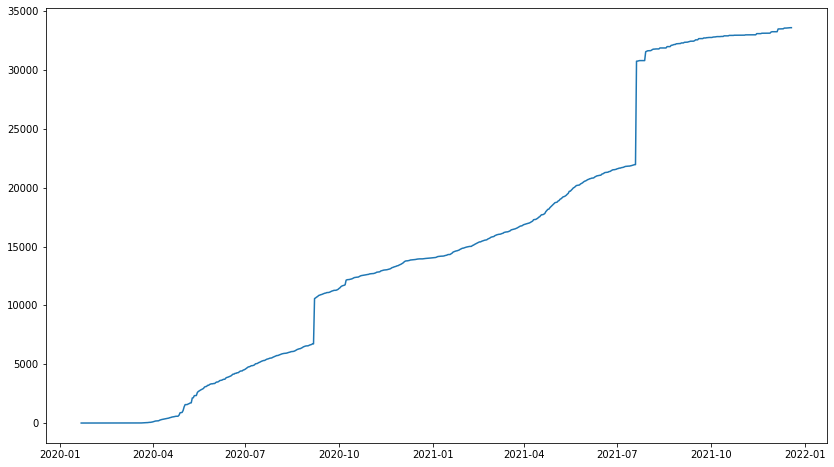

In [ ]:
plt.figure(figsize=[14, 8])
plt.plot(deaths.date, deaths.accumulated)
plt.show()

Como ya se tiene los fallecimientos acumulados, se crea una columna con los fallecimientos diarios.

In [ ]:
deaths['new'] = deaths['accumulated'].diff()

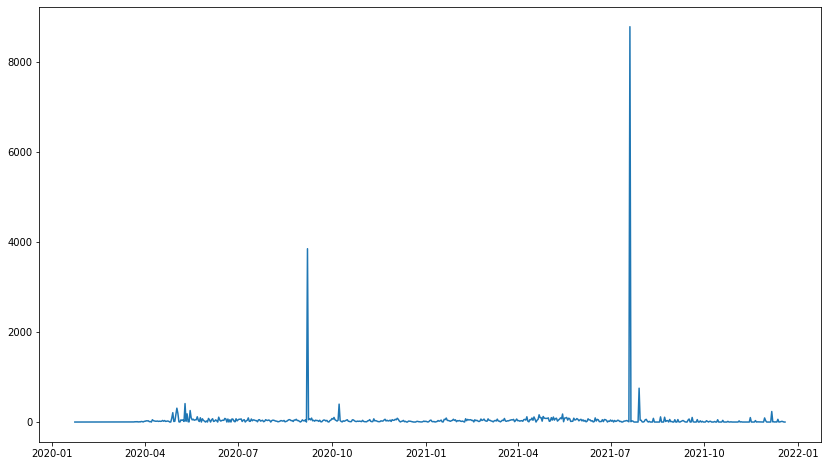

In [ ]:
plt.figure(figsize=[14, 8])
plt.plot(deaths.date, deaths.new)
plt.show()

## Exportar

In [ ]:
deaths.to_pickle('/work/covid-ec/data/processed/deaths.pkl')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>